# Musk Classification 

### About 

#### The given dataset contains details about organic chemical compounds including their chemical features, isomeric conformation, names and the classes in which they are classified. The compounds are classified as either ‘Musk’ or ‘Non-Musk’ compounds.
### Your task is to build a classification model on the given data using any Deep Learning approach 

###  Attributes in musk_csv.csv

1. molecule_name: Symbolic name of each molecule.
2. conformation_name: Symbolic name of each conformation
3. f1-f166: These are chemical features.
4. class: 0 if compound is classified as non-musk, 1 if compound is classified as musk

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn import preprocessing 
from keras.models import Sequential
from keras.layers import Dense,Activation, Dropout
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import recall_score 

Using TensorFlow backend.


### Exploratory Data Analysis 

In [2]:
df=pd.read_csv("musk_csv.csv")
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [3]:
df.tail()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,...,40,124,-14,-30,107,171,-44,-115,118,0


In [4]:
df.shape

(6598, 170)

In [5]:
df.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

### Checking for any null values 

In [6]:
#Check for null values
df.isnull().any()

ID                   False
molecule_name        False
conformation_name    False
f1                   False
f2                   False
f3                   False
f4                   False
f5                   False
f6                   False
f7                   False
f8                   False
f9                   False
f10                  False
f11                  False
f12                  False
f13                  False
f14                  False
f15                  False
f16                  False
f17                  False
f18                  False
f19                  False
f20                  False
f21                  False
f22                  False
f23                  False
f24                  False
f25                  False
f26                  False
f27                  False
                     ...  
f138                 False
f139                 False
f140                 False
f141                 False
f142                 False
f143                 False
f

In [7]:
df['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

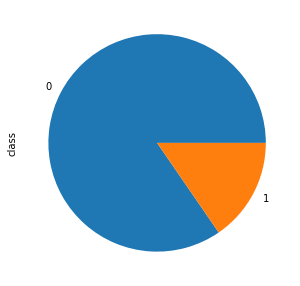

In [8]:
#plotting pie chart for class
df['class'].value_counts().plot(kind='pie', figsize=(5,5))

#### Observation : Class variable is imbalanced, will use SMOTE to balance the data

In [9]:
# Dropping ID, molecule_name, Conformation_name features from dataframe
df = df.drop(['ID'],axis=1)
df = df.drop(['molecule_name'],axis=1)
df = df.drop(['conformation_name'],axis=1)

In [10]:
df.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=167)

### Splitting the data into 80:20 ratio 

In [12]:
y=df['class']
X=df.drop('class',axis=1)

In [13]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
scaler = preprocessing.StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

### Resampling using SMOTE to balance data

In [15]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [16]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, counts of label '1': 4470
After OverSampling, counts of label '0': 4470


### Model 1 

In [17]:
model = Sequential()
model.add(Dense(64,activation='relu', input_shape=(166,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

W1215 14:19:50.698777  8876 deprecation_wrapper.py:119] From c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1215 14:19:50.730056  8876 deprecation_wrapper.py:119] From c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1215 14:19:50.745678  8876 deprecation_wrapper.py:119] From c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                10688     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W1215 14:20:00.316965  8876 deprecation_wrapper.py:119] From c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1215 14:20:00.348249  8876 deprecation_wrapper.py:119] From c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1215 14:20:00.363829  8876 deprecation.py:323] From c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
history = model.fit(X_train_res,y_train_res,epochs=50,batch_size=128,validation_data=(X_test,y_test))
score = model.evaluate(X_test,y_test,verbose=0)

W1215 14:20:48.797669  8876 deprecation_wrapper.py:119] From c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 8940 samples, validate on 1320 samples
Epoch 1/50
8940/8940 [==============================] - 1s 79us/step - loss: 0.3586 - acc: 0.8451 - val_loss: 0.1907 - val_acc: 0.9265
Epoch 2/50
8940/8940 [==============================] - 0s 23us/step - loss: 0.1426 - acc: 0.9503 - val_loss: 0.1134 - val_acc: 0.9629
Epoch 3/50
8940/8940 [==============================] - 0s 24us/step - loss: 0.0850 - acc: 0.9729 - val_loss: 0.0891 - val_acc: 0.9705
Epoch 4/50
8940/8940 [==============================] - 0s 23us/step - loss: 0.0581 - acc: 0.9834 - val_loss: 0.0603 - val_acc: 0.9773
Epoch 5/50
8940/8940 [==============================] - 0s 23us/step - loss: 0.0400 - acc: 0.9890 - val_loss: 0.0502 - val_acc: 0.9856
Epoch 6/50
8940/8940 [==============================] - 0s 23us/step - loss: 0.0293 - acc: 0.9927 - val_loss: 0.0403 - val_acc: 0.9856
Epoch 7/50
8940/8940 [==============================] - 0s 23us/step - loss: 0.0213 - acc: 0.9957 - val_loss: 0.0357 - val_acc: 0.9871
Epoch 8

In [21]:
print("Accuracy : %.2f%%" % (score[1]*100))

Accuracy : 99.70%


### Saving h5 model 

In [50]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [22]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


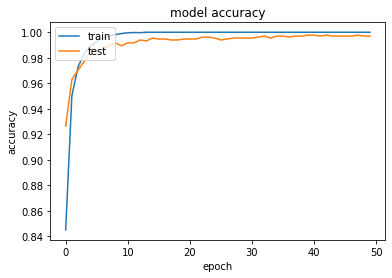

In [23]:
# summarize history for accuracy 
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

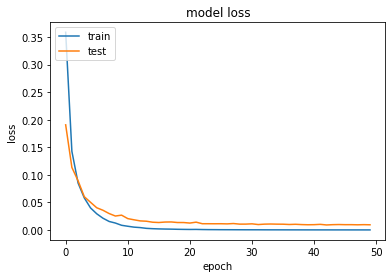

In [24]:
# summarize history for loss 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [25]:
#Reference is taken from here : https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)

In [26]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [27]:
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)

recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)

f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.996970
Precision: 0.995169
Recall: 0.985646
F1 score: 0.990385


### Model 2 

In [28]:
model_2 = Sequential()
model_2.add(Dense(128,activation='relu', input_shape=(166,)))
model_2.add(Dense(64,activation='relu'))
model_2.add(Dense(64,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))

In [29]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               21376     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
history = model_2.fit(X_train_res,y_train_res,epochs=50,batch_size=128,validation_data=(X_test,y_test))
score1 = model_2.evaluate(X_test,y_test,verbose=0)

Train on 8940 samples, validate on 1320 samples
Epoch 1/50
8940/8940 [==============================] - 1s 104us/step - loss: 0.2601 - acc: 0.8909 - val_loss: 0.1067 - val_acc: 0.9561
Epoch 2/50
8940/8940 [==============================] - 0s 28us/step - loss: 0.0717 - acc: 0.9762 - val_loss: 0.0725 - val_acc: 0.9765
Epoch 3/50
8940/8940 [==============================] - 0s 28us/step - loss: 0.0312 - acc: 0.9930 - val_loss: 0.0388 - val_acc: 0.9871
Epoch 4/50
8940/8940 [==============================] - 0s 26us/step - loss: 0.0155 - acc: 0.9964 - val_loss: 0.0319 - val_acc: 0.9924
Epoch 5/50
8940/8940 [==============================] - 0s 28us/step - loss: 0.0087 - acc: 0.9980 - val_loss: 0.0281 - val_acc: 0.9864
Epoch 6/50
8940/8940 [==============================] - 0s 28us/step - loss: 0.0056 - acc: 0.9985 - val_loss: 0.0159 - val_acc: 0.9932
Epoch 7/50
8940/8940 [==============================] - 0s 28us/step - loss: 0.0030 - acc: 0.9993 - val_loss: 0.0101 - val_acc: 0.9962
Epoch 

In [32]:
print("Accuracy : %.2f%%" % (score1[1]*100))

Accuracy : 99.70%


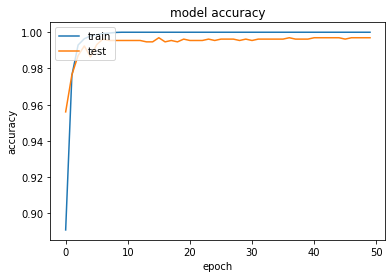

In [34]:
# summarize history for accuracy 
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

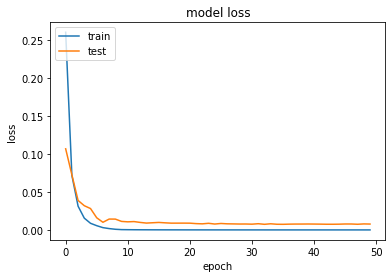

In [35]:
# summarize history for loss 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [36]:
# predict probabilities for test set
yhat_probs = model_2.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model_2.predict_classes(X_test, verbose=0)

In [37]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [38]:
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)

recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)

f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.996970
Precision: 0.995169
Recall: 0.985646
F1 score: 0.990385


### Model 3 

In [39]:
model_3 = Sequential()
model_3.add(Dense(264,activation='relu', input_shape=(166,)))
model_3.add(Dense(128,activation='relu'))
model_3.add(Dense(128,activation='relu'))
model_3.add(Dense(64,activation='relu'))
model_3.add(Dense(1,activation='sigmoid'))

In [40]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 264)               44088     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               33920     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 102,841
Trainable params: 102,841
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
history = model_3.fit(X_train_res,y_train_res,epochs=50,batch_size=128,validation_data=(X_test,y_test))
score3 = model_3.evaluate(X_test,y_test,verbose=0)

Train on 8940 samples, validate on 1320 samples
Epoch 1/50
8940/8940 [==============================] - 1s 132us/step - loss: 0.2194 - acc: 0.9030 - val_loss: 0.0942 - val_acc: 0.9591
Epoch 2/50
8940/8940 [==============================] - 0s 38us/step - loss: 0.0544 - acc: 0.9776 - val_loss: 0.0514 - val_acc: 0.9795
Epoch 3/50
8940/8940 [==============================] - 0s 40us/step - loss: 0.0289 - acc: 0.9896 - val_loss: 0.0354 - val_acc: 0.9833
Epoch 4/50
8940/8940 [==============================] - 0s 40us/step - loss: 0.0099 - acc: 0.9969 - val_loss: 0.0192 - val_acc: 0.9947
Epoch 5/50
8940/8940 [==============================] - 0s 40us/step - loss: 0.0056 - acc: 0.9984 - val_loss: 0.0183 - val_acc: 0.9924
Epoch 6/50
8940/8940 [==============================] - 0s 42us/step - loss: 0.0054 - acc: 0.9983 - val_loss: 0.0110 - val_acc: 0.9947
Epoch 7/50
8940/8940 [==============================] - 0s 38us/step - loss: 0.0024 - acc: 0.9992 - val_loss: 0.0248 - val_acc: 0.9939
Epoch 

In [43]:
print("Accuracy : %.2f%%" % (score3[1]*100))

Accuracy : 99.62%


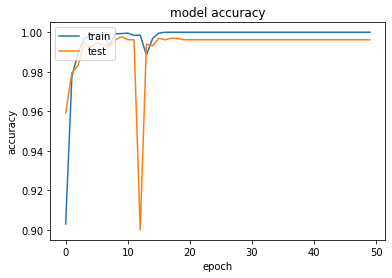

In [44]:
# summarize history for accuracy 
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

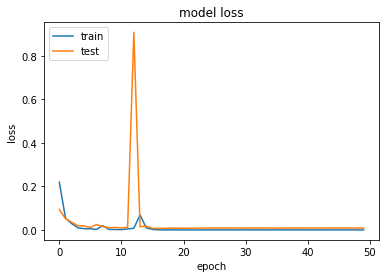

In [45]:
# summarize history for loss 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [46]:
# predict probabilities for test set
yhat_probs = model_3.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model_3.predict_classes(X_test, verbose=0)

In [47]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [48]:
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)

recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)

f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.996212
Precision: 0.990385
Recall: 0.985646
F1 score: 0.988010


### Prettytable 

In [49]:
from prettytable import PrettyTable
x=PrettyTable()
print("Machine Learning Models")
x.field_names=['Model','Accuracy','Precision','Recall','F1-Score']
x.add_row(['Model 1',0.996970,0.995169,0.985646,0.990385])
x.add_row(['Model 2',0.996970,0.995169,0.985646,0.990385])
x.add_row(['Model 3',0.996212,0.990385,0.985646,0.988010])
print(x)

Machine Learning Models
+---------+----------+-----------+----------+----------+
|  Model  | Accuracy | Precision |  Recall  | F1-Score |
+---------+----------+-----------+----------+----------+
| Model 1 | 0.99697  |  0.995169 | 0.985646 | 0.990385 |
| Model 2 | 0.99697  |  0.995169 | 0.985646 | 0.990385 |
| Model 3 | 0.996212 |  0.990385 | 0.985646 | 0.98801  |
+---------+----------+-----------+----------+----------+


### Conclusions 

1. This problem is a binary class classification problem and we have to predict class for organic chemical compounds.
2. Total features in the dataset are 170 which includes target feature class.
3. molecule_name, conformation_name and ID are not important features for prediction so we drop them.
4. We have build three models. Each model is a Multi Layered Perceptron model. MLPs are suitable for classification prediction problems where inputs are assigned a class or label
5. Each model is sequential model which is a linear stack of Layers.
6. We have plotted Accuracy and Loss graphs for each model.
7. Also calculated Acccuracy, Precision, Recall and F1-score values for each model.
8. Class feature of Dataset was imbalanced which effects the model. We used SMOTE technique to balance the dataset so that model does not do predictions on the basis of majority class.
9. For preprocessing we did Data Standardization to scale the data.
10. There were no null values in the data.
11. Also size of the dataset is small. That's why accuracy of model is almost 100%. We should have more data for model to perform better.
12. Model 1 and 2 have less layers than Model 3 and recall value is same for all models.
13. I have used Model 1 for predictions.